In [1]:
#import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
%matplotlib inline

In [3]:
#importthe required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load fraud dataset
data1 = pd.read_csv('dataset1.csv')
data2 = pd.read_csv('dataset2.csv')

data1.head()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.0,302.0,60.0,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.0,46066.0,38985.0,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.0,30355.0,14000.0,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.0,39663.0,18843.0,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.0,35586.0,29515.0,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1


In [7]:
data2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
data1.shape

(1048574, 11)

In [11]:
data2.shape

(1048575, 11)

In [13]:
data1.columns

Index(['Date', 'nameOrig', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'City',
       'type', 'Card Type', 'Exp Type', 'Gender', 'isFraud'],
      dtype='object')

In [15]:
data2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Date            1048574 non-null  object 
 1   nameOrig        1048574 non-null  object 
 2   amount          1048574 non-null  float64
 3   oldbalanceOrg   1048574 non-null  float64
 4   newbalanceOrig  1048574 non-null  float64
 5   City            1048574 non-null  object 
 6   type            1048574 non-null  object 
 7   Card Type       1048574 non-null  object 
 8   Exp Type        1048574 non-null  object 
 9   Gender          1048574 non-null  object 
 10  isFraud         1048574 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 88.0+ MB


In [21]:
correlation_matrix = data1.select_dtypes(include=['number']).corr()

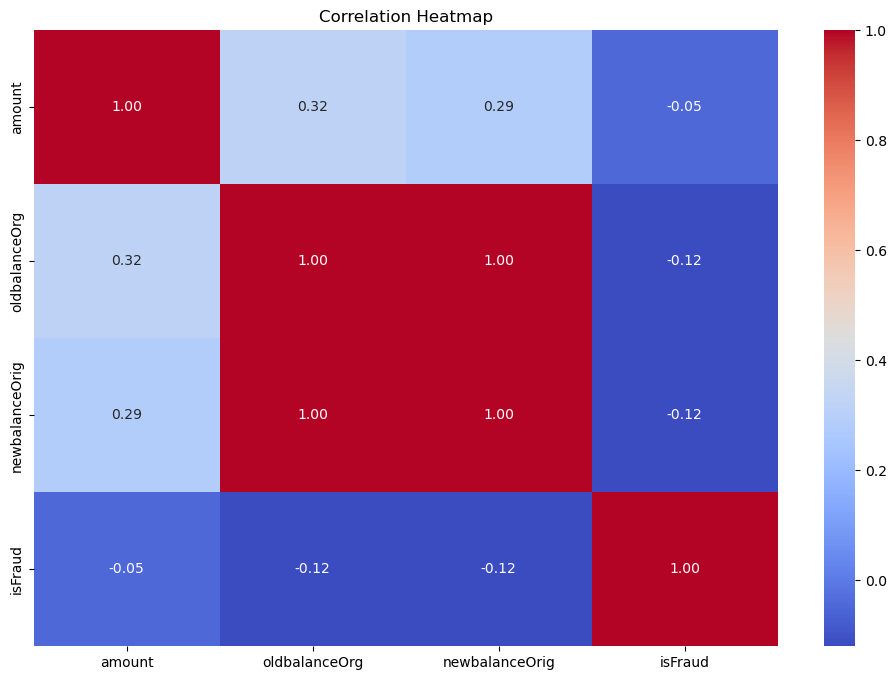

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
correlation_matrix = data2.select_dtypes(include=['number']).corr()

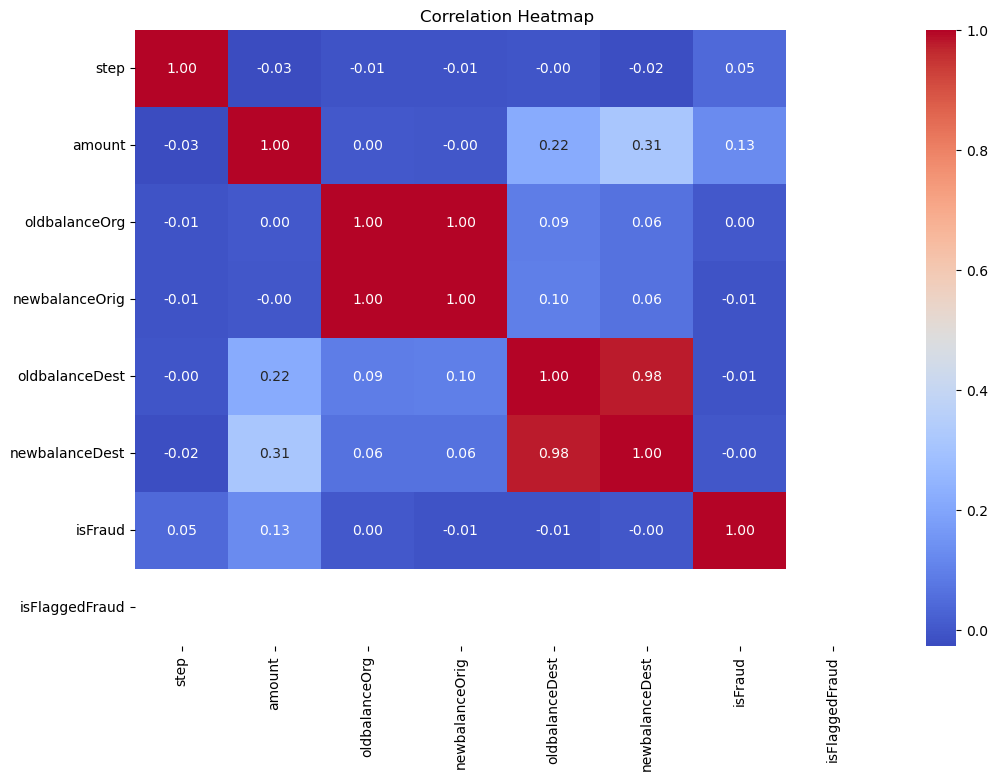

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
#dropping some columns
data1_clean = data1.drop(['nameOrig', 'oldbalanceOrg', 'newbalanceOrig'], axis = 1)
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1048574 non-null  object 
 1   amount     1048574 non-null  float64
 2   City       1048574 non-null  object 
 3   type       1048574 non-null  object 
 4   Card Type  1048574 non-null  object 
 5   Exp Type   1048574 non-null  object 
 6   Gender     1048574 non-null  object 
 7   isFraud    1048574 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [25]:
#dropping some columns
data2_clean = data2.drop(['nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'], axis = 1)
data2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   isFraud         1048575 non-null  int64  
 4   isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 40.0+ MB


In [39]:
data2['isFlaggedFraud'].unique()

array([0], dtype=int64)

In [47]:
data1_clean['date'] = pd.to_datetime(data1_clean['Date'])
data1_clean = data1_clean.drop(['Date'], axis=1)

C:\Users\victo\AppData\Local\Temp\ipykernel_10420\1426274607.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1_clean['date'] = pd.to_datetime(data1_clean['Date'])


In [50]:
data1_clean.describe().style.format("{:,.2f}")

,amount,isFraud,date
count,"1,048,574.00","1,048,574.00","1,048,574.00"
mean,"38,027.67",0.17,",.2f"
min,0.00,0.00,",.2f"
25%,647.00,0.00,",.2f"
50%,"8,263.00",0.00,",.2f"
75%,"23,650.00",0.00,",.2f"
max,"10,000,000.00",1.00,",.2f"
std,"110,516.83",0.37,nan


In [52]:
data2_clean.describe().style.format("{:,.2f}")

,step,amount,isFraud,isFlaggedFraud
count,"1,048,575.00","1,048,575.00","1,048,575.00","1,048,575.00"
mean,26.97,"158,666.98",0.00,0.00
std,15.62,"264,940.93",0.03,0.00
min,1.00,0.10,0.00,0.00
25%,15.00,"12,149.07",0.00,0.00
50%,20.00,"76,343.33",0.00,0.00
75%,39.00,"213,761.89",0.00,0.00
max,95.00,"10,000,000.00",1.00,0.00


In [60]:
# Set style and palette for visuals
sns.set_palette(["#CC5500", "#003366"])
sns.set_style("whitegrid")

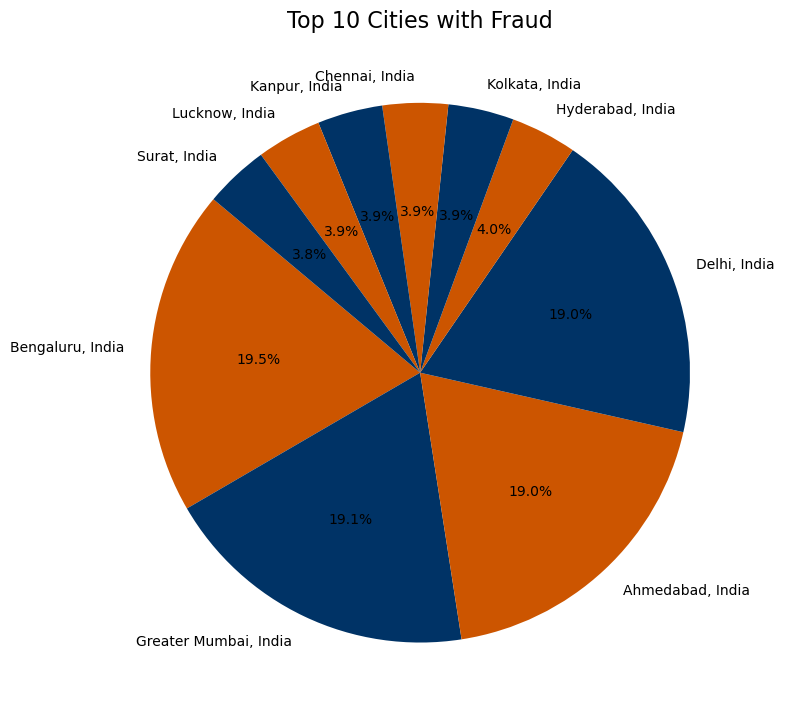

In [58]:
#Fraud by City
plt.figure(figsize=(8, 8))
city_fraud = data1_clean[data1_clean["isFraud"] == 1]["City"].value_counts().head(10)  # Top 10 cities
plt.pie(city_fraud, labels=city_fraud.index, autopct="%1.1f%%", colors=sns.color_palette(["#CC5500", "#003366"]), startangle=140)
plt.title("Top 10 Cities with Fraud", fontsize=16)
plt.tight_layout()
plt.show()

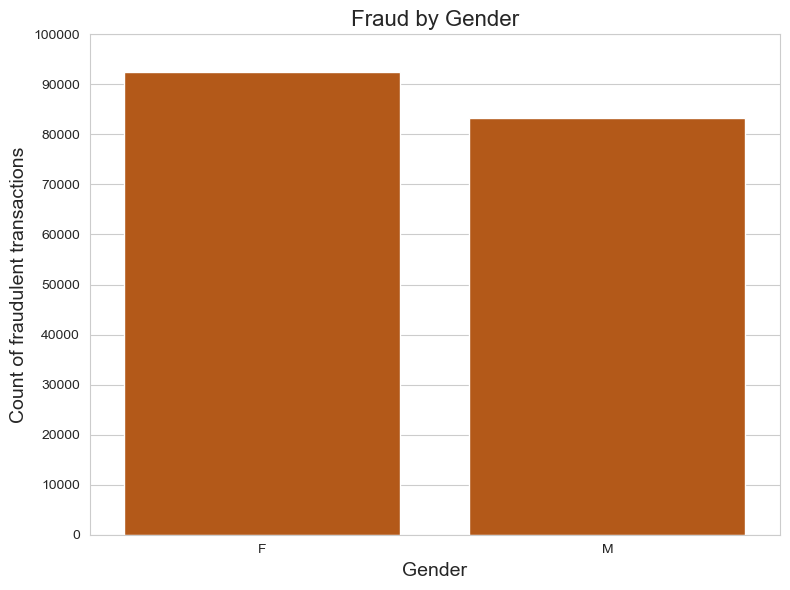

In [72]:
Fraud by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data1_clean[data1_clean["isFraud"] == 1], x="Gender", color="#CC5500")
plt.title("Fraud by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count of fraudulent transactions", fontsize=14)
max_y = data1_clean[data1_clean["isFraud"] == 1]["Gender"].value_counts().max()
plt.yticks(range(0, max_y + 10000, 10000))

plt.tight_layout()
plt.show()

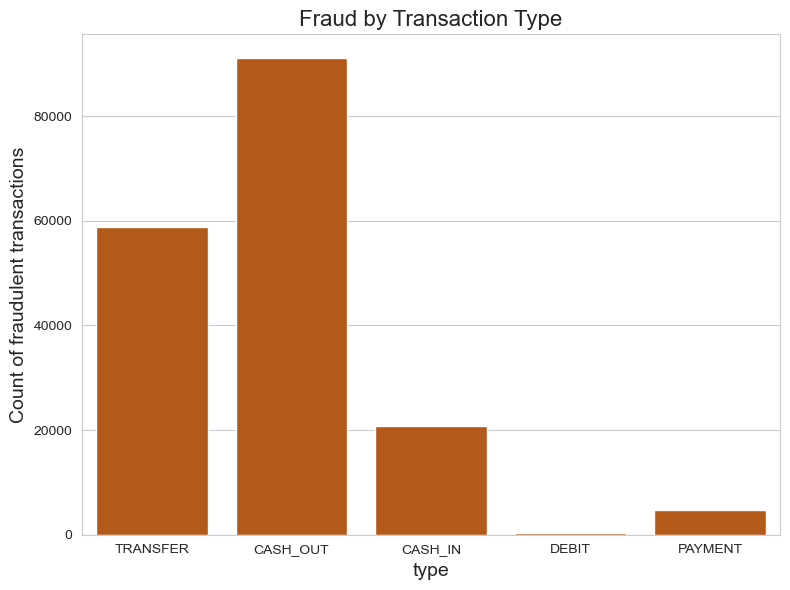

In [74]:
# Fraud by Transaction Type -
plt.figure(figsize=(8, 6))
sns.countplot(data=data1_clean[data1_clean["isFraud"] == 1], x="type", color="#CC5500")
plt.title("Fraud by Transaction Type", fontsize=16)
plt.xlabel("type", fontsize=14)
plt.ylabel("Count of fraudulent transactions", fontsize=14)
plt.tight_layout()
plt.show()

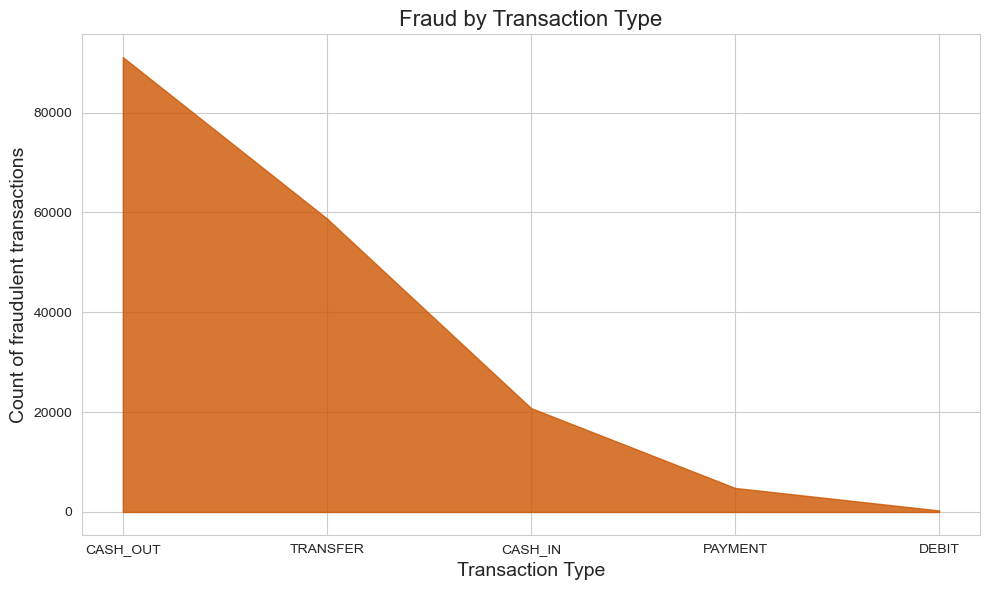

In [76]:
# Fraud by Transaction Type -
plt.figure(figsize=(10, 6))
fraud_by_type = data1_clean[data1_clean["isFraud"] == 1]["type"].value_counts()
plt.fill_between(fraud_by_type.index, fraud_by_type, color="#CC5500", alpha=0.8)
plt.title("Fraud by Transaction Type", fontsize=16)
plt.xlabel("Transaction Type", fontsize=14)
plt.ylabel("Count of fraudulent transactions", fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

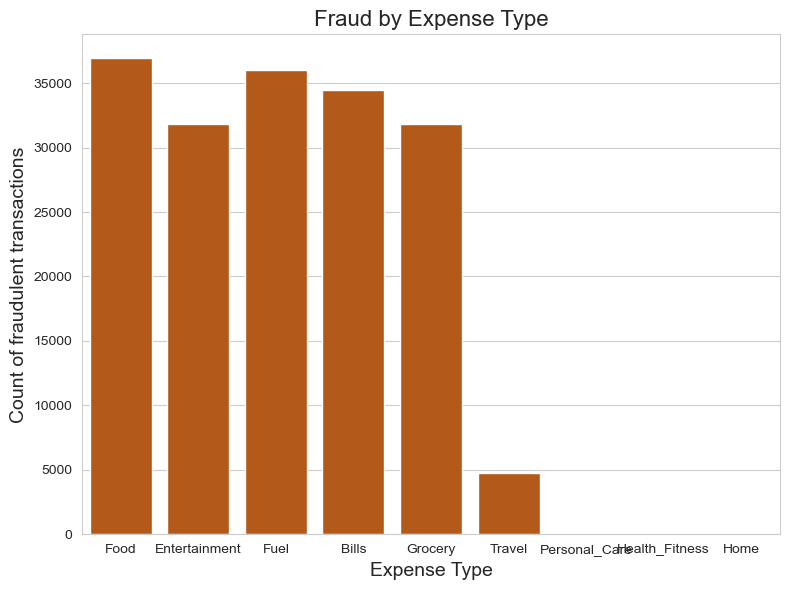

In [80]:
# Fraud by Expense Type
plt.figure(figsize=(8, 6))
sns.countplot(data=data1_clean[data1_clean["isFraud"] == 1], x="Exp Type", color="#CC5500")
plt.title("Fraud by Expense Type", fontsize=16)
plt.xlabel("Expense Type", fontsize=14)
plt.ylabel("Count of fraudulent transactions", fontsize=14)
plt.tight_layout()
plt.show()

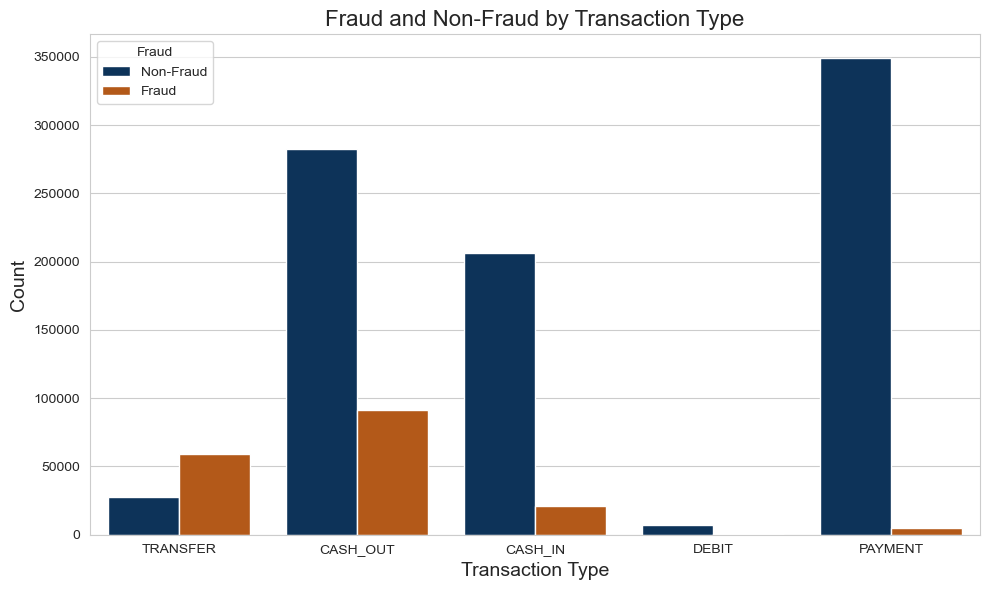

In [86]:
#Fraud and Non-Fraud by Transaction Type - Grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=data1_clean, x="type", hue="isFraud", palette=["#003366", "#CC5500"])
plt.title("Fraud and Non-Fraud by Transaction Type", fontsize=16)
plt.xlabel("Transaction Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])
plt.tight_layout()
plt.show()

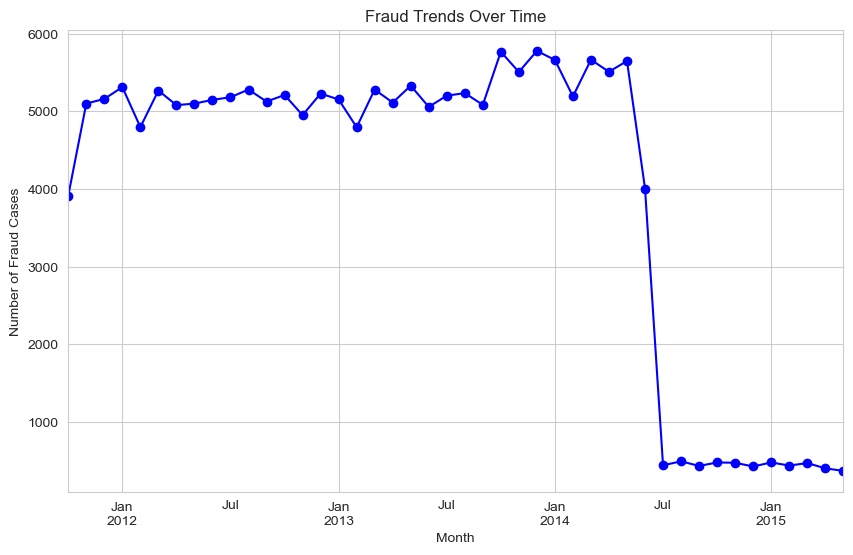

In [90]:
#Fraud Over Time

data1_clean['month'] = data1_clean['date'].dt.to_period('M')
fraud_trends = data1_clean[data1_clean['isFraud'] == 1].groupby('month').size()
fraud_trends.plot(kind='line', figsize=(10, 6), marker='o', color='blue')
plt.title('Fraud Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Fraud Cases')
plt.grid(True)
plt.show()

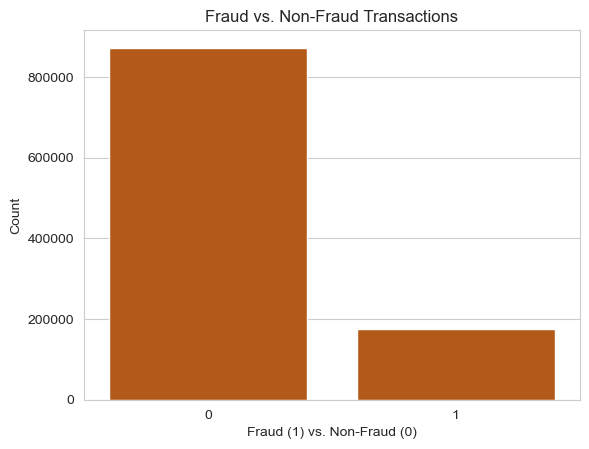

In [92]:
#Fraud Distribution
#Show the number of fraudulent and non-fraudulent transactions

sns.countplot(x='isFraud', data=data1_clean)
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xlabel('Fraud (1) vs. Non-Fraud (0)')
plt.ylabel('Count')
plt.show()

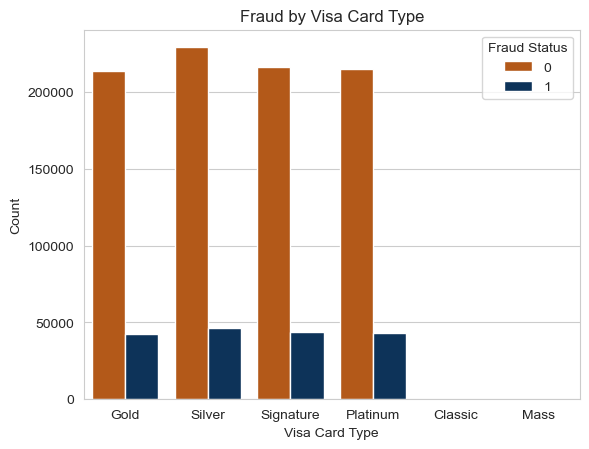

In [120]:
# Card Type and Fraud
#Investigate fraud cases based on card type.

sns.countplot(x='Card Type', hue='isFraud', data=data1_clean)
plt.title('Fraud by Visa Card Type')
plt.xlabel('Visa Card Type')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right')
plt.show()

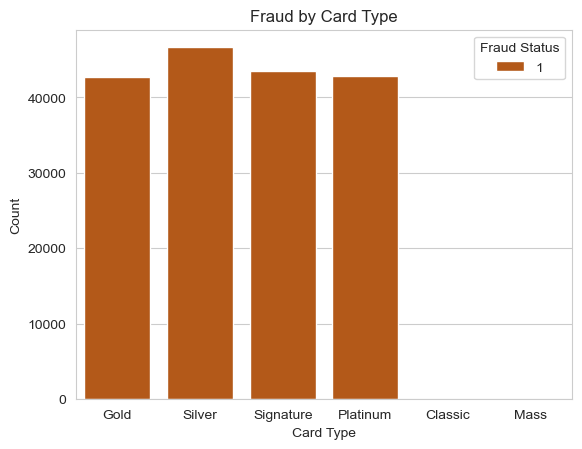

In [96]:
# Fraud by Card Type

fraud_data = data1_clean[data1_clean["isFraud"] == 1]
sns.countplot(x='Card Type', hue='isFraud', data=fraud_data)
plt.title('Fraud by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right')
plt.show()

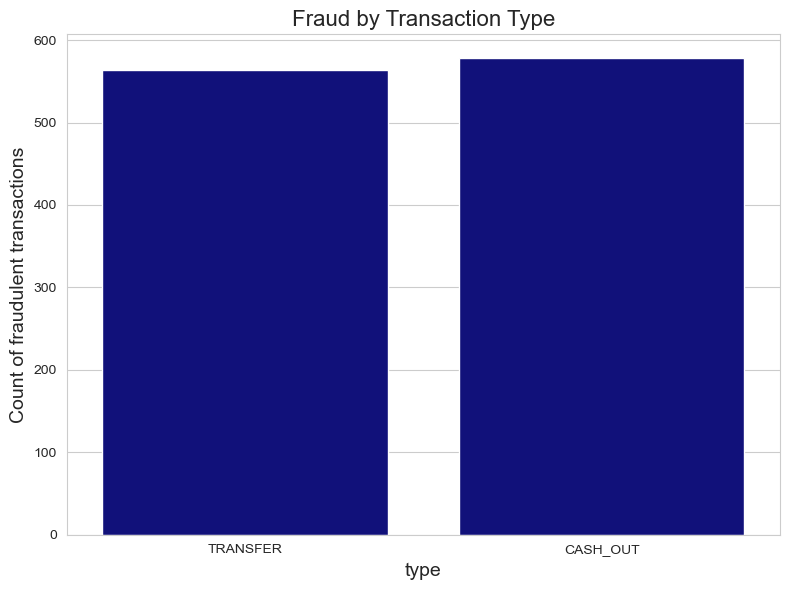

In [100]:
# Fraud by Transaction Type for dataset2
plt.figure(figsize=(8, 6))
sns.countplot(data=data2_clean[data2_clean["isFraud"] == 1], x="type", color="#00008B")
plt.title("Fraud by Transaction Type", fontsize=16)
plt.xlabel("type", fontsize=14)
plt.ylabel("Count of fraudulent transactions", fontsize=14)
plt.tight_layout()
plt.show()

In [106]:
data1_clean.columns

Index(['amount', 'City', 'type', 'Card Type', 'Exp Type', 'Gender', 'isFraud',
       'date', 'month'],
      dtype='object')